In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.0.1
3.1


# Problem formulation

- Multi scatter plot (check)
- Feature scoring (check)
- Scenario discovery (PRIM) (selecteren juiste box, peeling alfa = default & threshold = 0.8)
- Dimensional stacking (op basis van resultaten ws meer runs nodig)

In [3]:
experiments = pd.read_csv('data/output_data/experiments_2000s_0p.csv')
outcomes = pd.read_csv('data/output_data/outcomes_2000s_0p.csv')

experiments = experiments.drop(columns='Unnamed: 0')
outcomes = outcomes.drop(columns='Unnamed: 0')
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,110,334.008648,10.0,0.729263,259.565899,10.0,0.673660,104.948965,10.0,0.550382,...,0,0,0,0,0,0,0,0,policy 0,dikesnet
1,56,158.582973,10.0,0.641079,327.393379,1.0,0.330776,253.114312,1.5,0.109510,...,0,0,0,0,0,0,0,1,policy 0,dikesnet
2,80,299.733430,10.0,0.184624,281.087283,1.0,0.481512,105.280240,1.0,0.930467,...,0,0,0,0,0,0,0,2,policy 0,dikesnet
3,61,151.914404,1.5,0.153804,176.530917,10.0,0.630006,272.552747,10.0,0.762337,...,0,0,0,0,0,0,0,3,policy 0,dikesnet
4,80,309.749958,1.0,0.422138,307.063572,10.0,0.217711,331.690263,1.5,0.705076,...,0,0,0,0,0,0,0,4,policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,24,219.930246,1.0,0.891368,275.617704,10.0,0.423842,30.879098,10.0,0.889828,...,0,0,0,0,0,0,0,19995,policy 0,dikesnet
19996,26,192.896909,10.0,0.061889,150.176897,1.5,0.138363,299.317904,1.5,0.466195,...,0,0,0,0,0,0,0,19996,policy 0,dikesnet
19997,103,128.071261,1.5,0.054128,110.143125,1.5,0.690233,36.941079,1.5,0.445781,...,0,0,0,0,0,0,0,19997,policy 0,dikesnet
19998,119,186.803366,10.0,0.462298,125.963852,1.0,0.384373,327.711865,10.0,0.702281,...,0,0,0,0,0,0,0,19998,policy 0,dikesnet


In [4]:
outcomes

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy
0,2.118204e+08,0,0.0,0.0,0.309755,policy 0
1,1.507760e+09,0,0.0,0.0,3.087211,policy 0
2,1.874935e+09,0,0.0,0.0,1.556953,policy 0
3,2.346989e+09,0,0.0,0.0,1.622508,policy 0
4,1.106388e+09,0,0.0,0.0,0.734634,policy 0
...,...,...,...,...,...,...
19995,1.271563e+08,0,0.0,0.0,0.112194,policy 0
19996,2.282437e+09,0,0.0,0.0,1.601569,policy 0
19997,2.253348e+09,0,0.0,0.0,1.845837,policy 0
19998,6.192569e+08,0,0.0,0.0,0.449564,policy 0


In [7]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,110,334.008648,10.0,0.729263,259.565899,10.0,0.673660,104.948965,10.0,0.550382,...,0,0,0,0,0,0,0,0,policy 0,dikesnet
1,56,158.582973,10.0,0.641079,327.393379,1.0,0.330776,253.114312,1.5,0.109510,...,0,0,0,0,0,0,0,1,policy 0,dikesnet
2,80,299.733430,10.0,0.184624,281.087283,1.0,0.481512,105.280240,1.0,0.930467,...,0,0,0,0,0,0,0,2,policy 0,dikesnet
3,61,151.914404,1.5,0.153804,176.530917,10.0,0.630006,272.552747,10.0,0.762337,...,0,0,0,0,0,0,0,3,policy 0,dikesnet
4,80,309.749958,1.0,0.422138,307.063572,10.0,0.217711,331.690263,1.5,0.705076,...,0,0,0,0,0,0,0,4,policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,24,219.930246,1.0,0.891368,275.617704,10.0,0.423842,30.879098,10.0,0.889828,...,0,0,0,0,0,0,0,19995,policy 0,dikesnet
19996,26,192.896909,10.0,0.061889,150.176897,1.5,0.138363,299.317904,1.5,0.466195,...,0,0,0,0,0,0,0,19996,policy 0,dikesnet
19997,103,128.071261,1.5,0.054128,110.143125,1.5,0.690233,36.941079,1.5,0.445781,...,0,0,0,0,0,0,0,19997,policy 0,dikesnet
19998,119,186.803366,10.0,0.462298,125.963852,1.0,0.384373,327.711865,10.0,0.702281,...,0,0,0,0,0,0,0,19998,policy 0,dikesnet


# Multiscatter plot

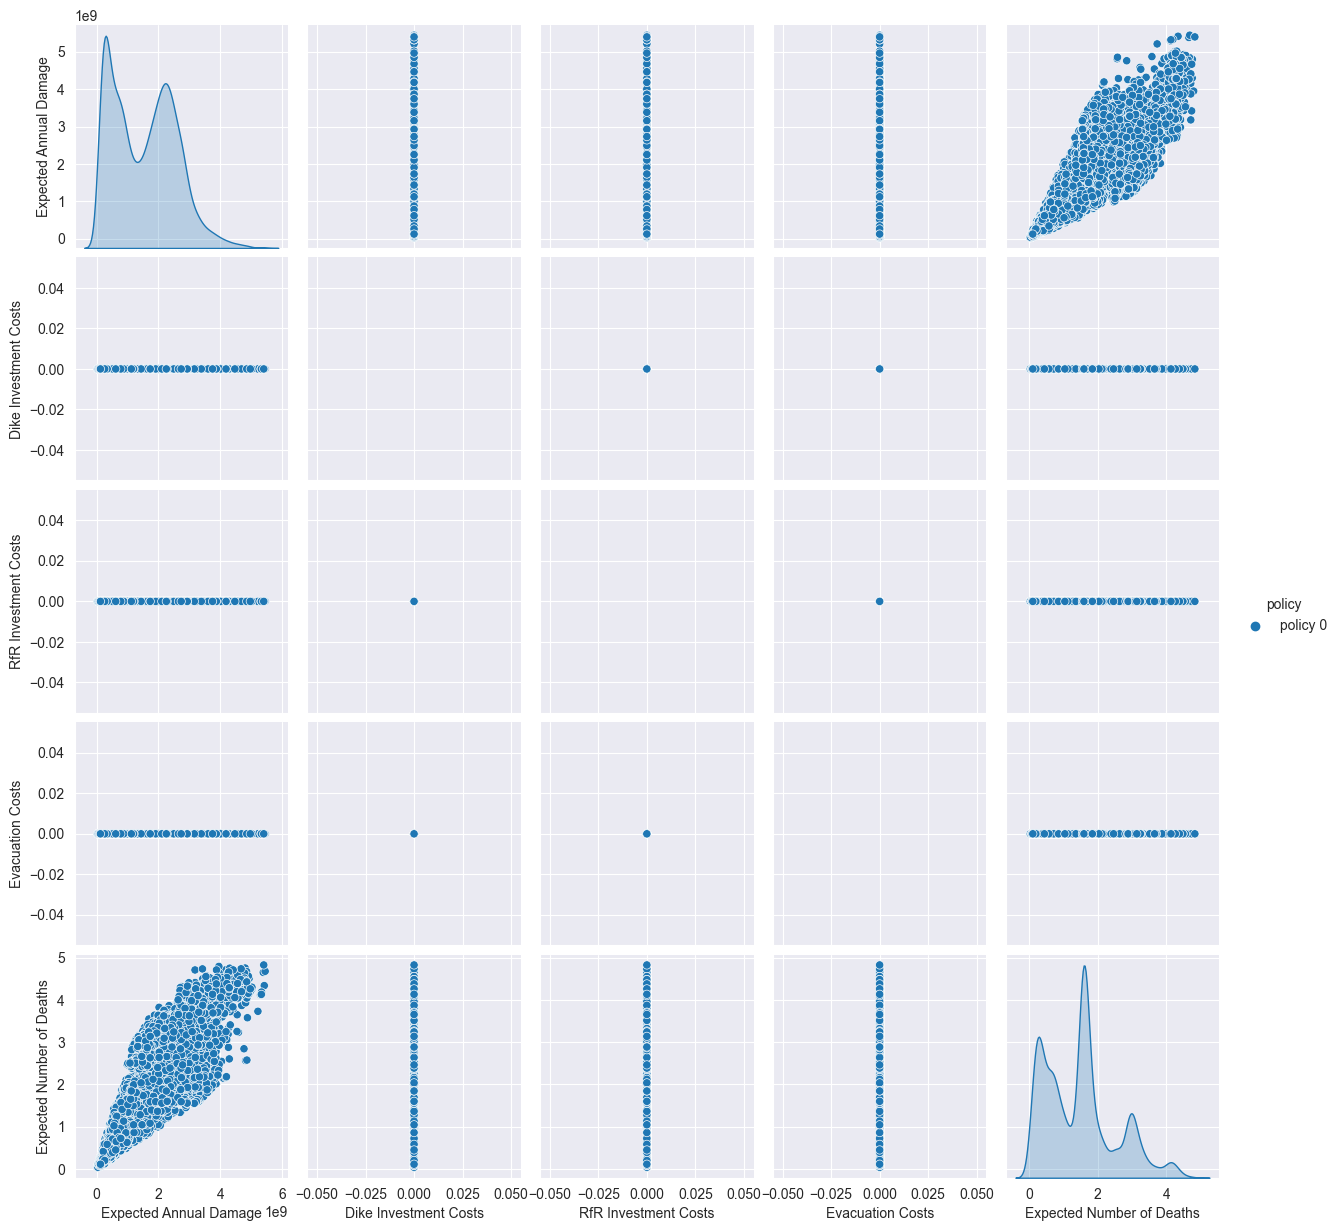

In [8]:
sns.pairplot(outcomes, hue='policy')
plt.show()

Explanation!

# Feature scoring

In [9]:
list_of_uncertainties = ['discount rate 0','discount rate 1','discount rate 2',\
'A.0_ID flood wave shape',
'A.1_Bmax','A.1_pfail','A.1_Brate',\
'A.2_Bmax','A.2_pfail','A.2_Brate',\
'A.3_Bmax','A.3_pfail','A.3_Brate',\
'A.4_Bmax','A.4_pfail','A.4_Brate',\
'A.5_Bmax','A.5_pfail','A.5_Brate',]

uncertainty_experiments = experiments.loc[:,list_of_uncertainties]
uncertainty_experiments

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,A.3_Bmax,A.3_pfail,A.3_Brate,A.4_Bmax,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate
0,2.5,4.5,1.5,110,334.008648,0.729263,10.0,259.565899,0.673660,10.0,104.948965,0.550382,10.0,198.370991,0.653486,10.0,145.140836,0.889992,10.0
1,3.5,4.5,3.5,56,158.582973,0.641079,10.0,327.393379,0.330776,1.0,253.114312,0.109510,1.5,273.861786,0.859324,1.0,41.255008,0.692840,1.5
2,2.5,4.5,4.5,80,299.733430,0.184624,10.0,281.087283,0.481512,1.0,105.280240,0.930467,1.0,94.898093,0.475867,10.0,254.955270,0.756406,1.0
3,2.5,2.5,3.5,61,151.914404,0.153804,1.5,176.530917,0.630006,10.0,272.552747,0.762337,10.0,212.494144,0.434449,1.0,108.918810,0.123266,10.0
4,4.5,1.5,1.5,80,309.749958,0.422138,1.0,307.063572,0.217711,10.0,331.690263,0.705076,1.5,242.262578,0.815530,10.0,80.963535,0.527218,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3.5,1.5,2.5,24,219.930246,0.891368,1.0,275.617704,0.423842,10.0,30.879098,0.889828,10.0,108.256773,0.813547,1.0,131.030426,0.915500,10.0
19996,4.5,1.5,3.5,26,192.896909,0.061889,10.0,150.176897,0.138363,1.5,299.317904,0.466195,1.5,192.212422,0.401485,10.0,113.526934,0.387252,10.0
19997,2.5,3.5,4.5,103,128.071261,0.054128,1.5,110.143125,0.690233,1.5,36.941079,0.445781,1.5,101.379230,0.562266,1.0,144.067864,0.035823,1.0
19998,1.5,2.5,4.5,119,186.803366,0.462298,10.0,125.963852,0.384373,1.0,327.711865,0.702281,10.0,86.548600,0.662147,1.5,141.285189,0.340833,10.0


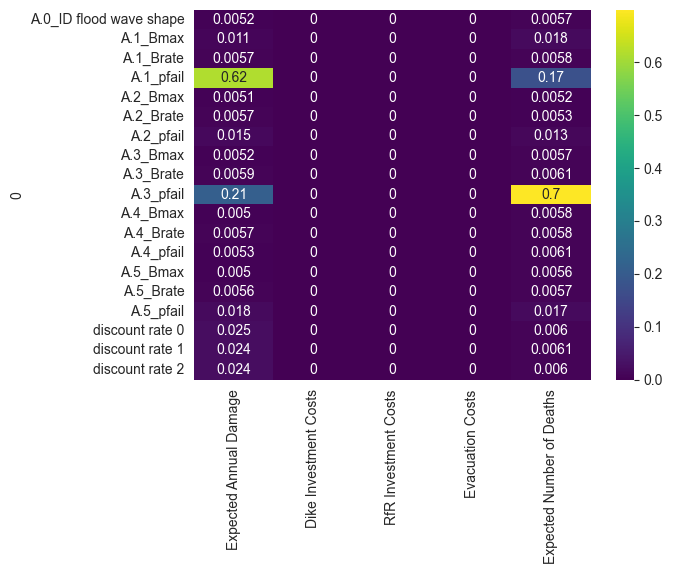

In [10]:
from ema_workbench.analysis import feature_scoring

fs = feature_scoring.get_feature_scores_all(uncertainty_experiments, outcomes.drop(columns='policy'))
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

Explanation!

# PRIM
### Expected Number of Deaths

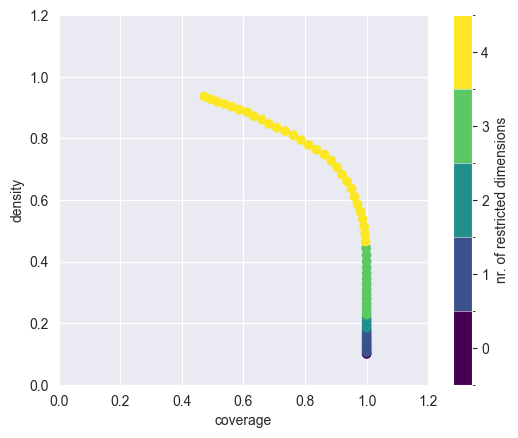

In [11]:
# Expected number of Death (looking at lowest 10%)
from ema_workbench.analysis import prim

x = uncertainty_experiments
y = outcomes['Expected Number of Deaths']< np.percentile(outcomes['Expected Number of Deaths'],10) #

prim_alg = prim.Prim(x, y, threshold=0.8)
# Peal alpha = default & threshold set to same value as used in assignments
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()


coverage     0.904000
density      0.705699
id          40.000000
mass         0.128100
mean         0.705699
res_dim      4.000000
Name: 40, dtype: float64

             box 40                                  
                min       max       qp value qp value
A.3_pfail  0.535185  0.999985  5.360612e-321      NaN
A.1_pfail  0.484515  0.999951  2.300038e-267      NaN
A.5_pfail  0.305614  0.999958   7.816051e-80      NaN
A.2_pfail  0.224246  0.999961   2.787088e-59      NaN



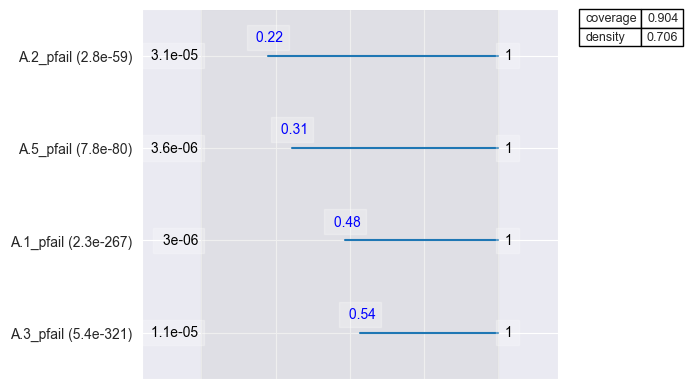

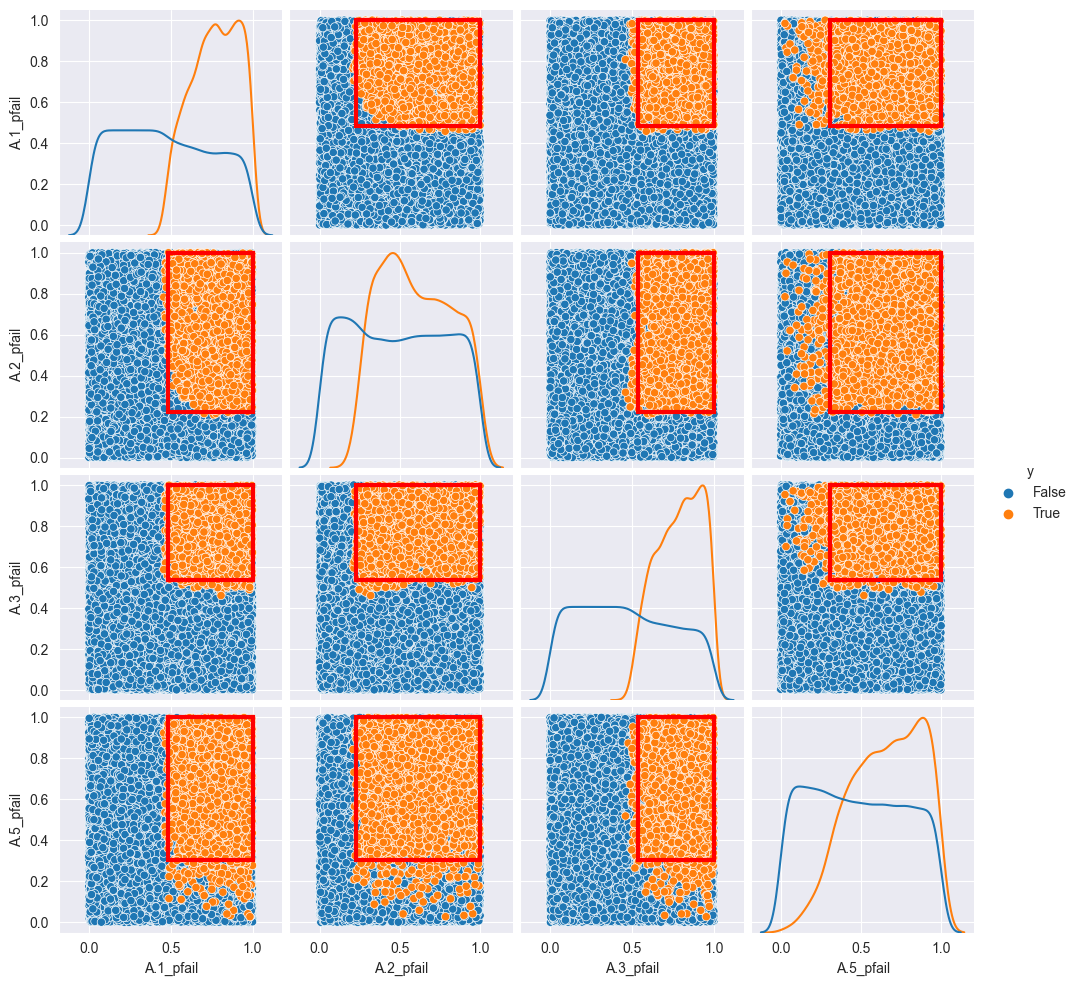

In [12]:
#NOG BEPALEN WELKE BOX WE WILLEN BEKIJKEN!
box1.inspect(40)
box1.inspect(40, style="graph")
box1.show_pairs_scatter(40)
plt.show()

### Expected annual damage

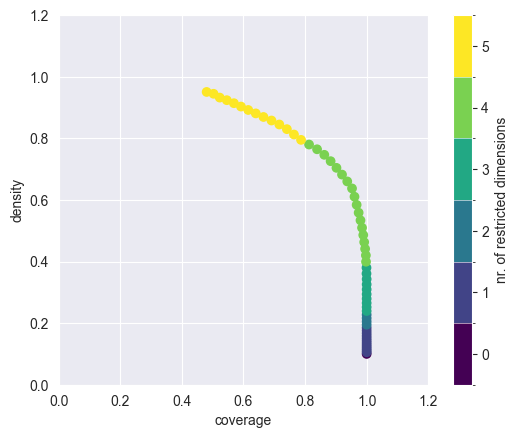

In [13]:
# Expected Expected Annual Damaga (looking at lowest 10%)

x = uncertainty_experiments
y = outcomes['Expected Annual Damage']< np.percentile(outcomes['Expected Annual Damage'],10)


prim_alg = prim.Prim(x, y, threshold=0.8)
# Peal alpha = default & threshold set to same value as used in assignments
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

coverage     0.902000
density      0.704137
id          40.000000
mass         0.128100
mean         0.704137
res_dim      4.000000
Name: 40, dtype: float64

             box 40                                  
                min       max       qp value qp value
A.1_pfail  0.533661  0.999951  2.856175e-314      NaN
A.3_pfail  0.459962  0.999985  1.223542e-237      NaN
A.5_pfail  0.306318  0.999958   3.677440e-90      NaN
A.2_pfail  0.261918  0.999961   2.951947e-73      NaN



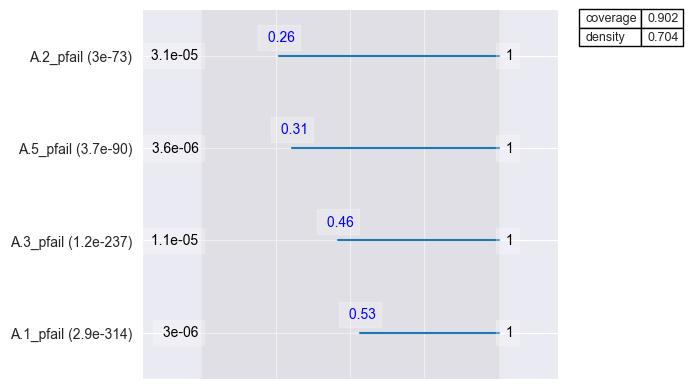

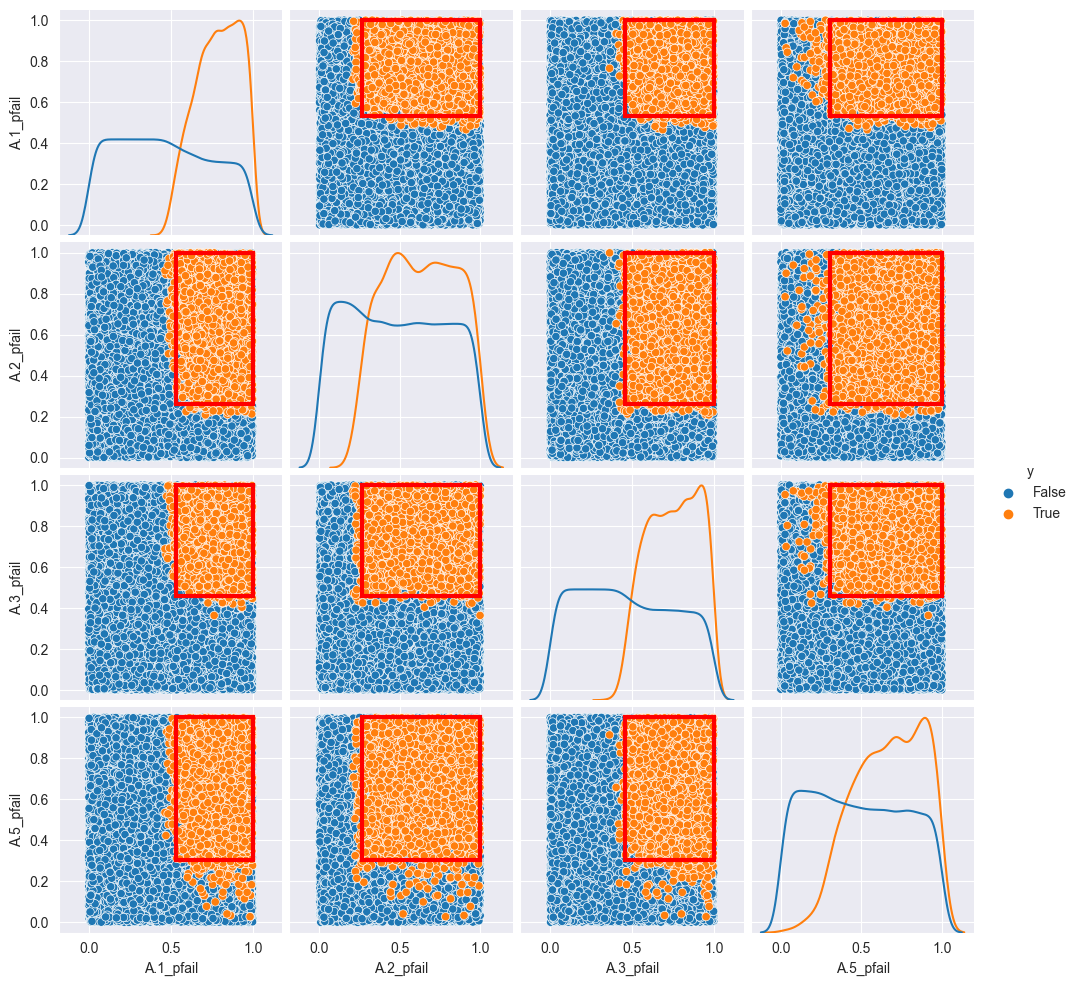

In [14]:
#NOG BEPALEN WELKE BOX WE WILLEN BEKIJKEN!
box1.inspect(40)
box1.inspect(40, style="graph")
box1.show_pairs_scatter(40)
plt.show()

# Dimensional stacking

### Expected Number of Deaths

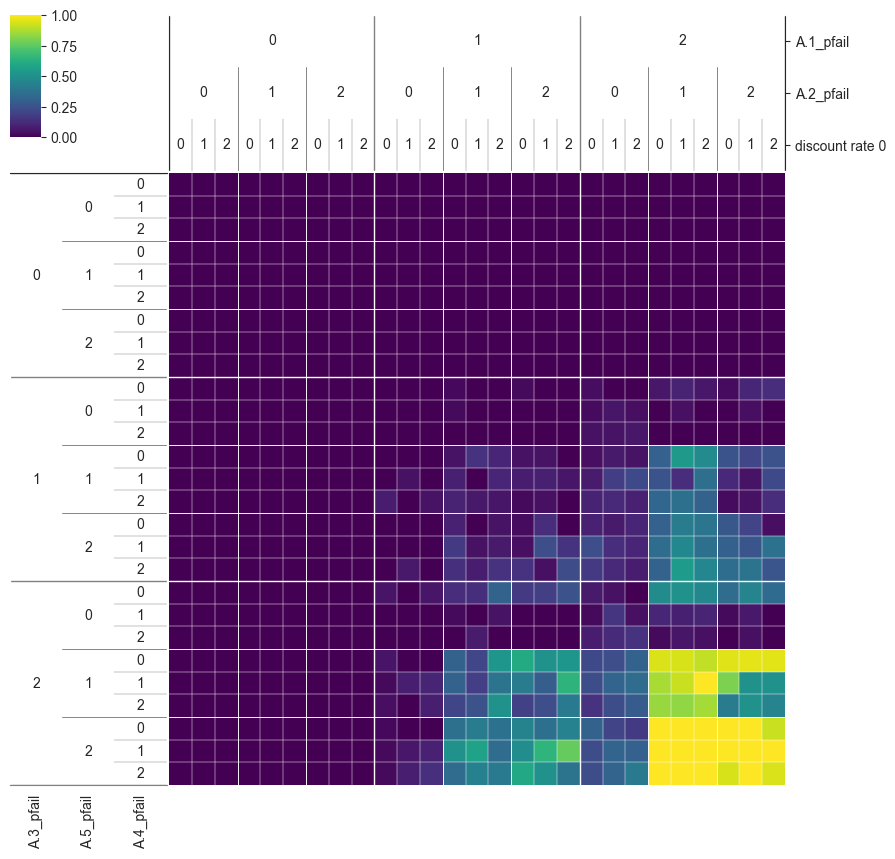

In [15]:
from ema_workbench.analysis import dimensional_stacking

x = uncertainty_experiments
y = outcomes['Expected Number of Deaths'].values < np.percentile(outcomes['Expected Number of Deaths'],10)
dimensional_stacking.create_pivot_plot(x,y)

plt.show()

In [16]:
y

array([False, False, False, ..., False, False, False])

### Expected Annual Damage

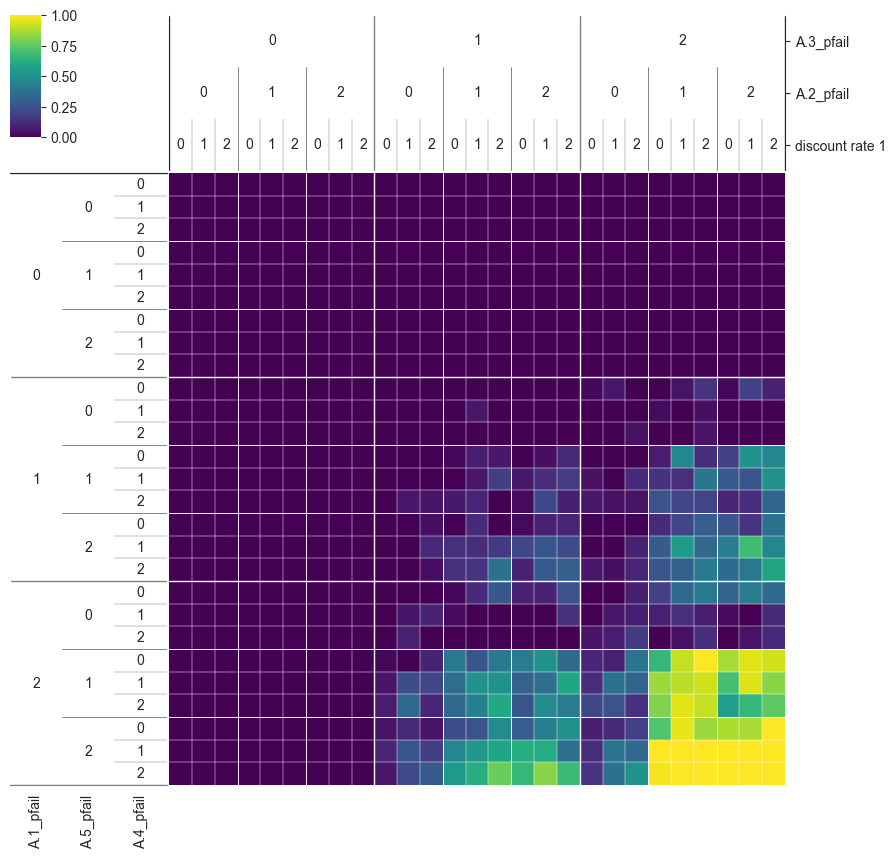

In [17]:
from ema_workbench.analysis import dimensional_stacking

x = uncertainty_experiments
y = outcomes['Expected Annual Damage'].values < np.percentile(outcomes['Expected Annual Damage'],10)
dimensional_stacking.create_pivot_plot(x,y)

plt.show()